In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg.set_sys_path()
from pylib import *
pkg

`isr.umich.edu-psid-inequality-1.3.3` Last Update: 2023-06-12T17:18:43

__



## Updating Data

To update the data, use the data extraction tool at the (PSID website. )[https://simba.isr.umich.edu/Cart/co.aspx], adding any new variables to your data cart. The (variable entry text box)[https://simba.isr.umich.edu/DC/l.aspx] is a handy way to copy the existing varibles into a new cart.  When you checkout your data cart, ( click on the cart icon ) fetch your dataset with these options: 

* Codebook Type: XML
* Data output type: dBase Data File, create compressed file

Download the ZIP file ( you might have to recompress it if your browser unpacks it ) and move it into the ``data`` directory. Set the reference to the new ZIP file, then re-build the package.
## Documentation Links

* [PSID Homepage](https://psidonline.isr.umich.edu/default.aspx) 

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* **[_labels](data/_labels.csv)**. Categorical value labels
* **[data_dictionary](data/data_dictionary.csv)**. Data dictionary with information about variables in this collection, extracted from XML
* **[variables](data/variables.csv)**. All PSID variables, with group infor for connecting variables across years.
* **[psid_ineq](data/psid_ineq.csv)**. PSID, Inequality extract

## References
<ul><li> <strong><a href="https://psidonline.isr.umich.edu/help/xyr/psid.xlsx">variables</a></strong>. Variable descriptions, in a cross-year format.</li><li> <strong>source</string>, <em>data/J321148.zip</em>. Downloaded source file</li><ul>

In [3]:
labels = pkg.resource('_labels').dataframe() # Use for searching for specific values of a variable.
dd = pkg.resource('data_dictionary').dataframe() # Use for info about vars in this data extract
varis = pkg.resource('variables').dataframe() # Use for infor about all vars in the PSID

In [4]:
df = pkg.resource('psid_ineq').dataframe(convert_categorical=True)
df.head()


,pid,er30001,er30002,er30000,er33501,er34701,er33503,er34703,er13001,er72001,...,er77631,er77632,er34864,er33547,er34863,er33546,er77507,s420,er77511,s417
0,4001,4,1,"Release number 3, June 2022",3,0,Head in 1999; 1997 Head who was mover-out nonr...,Inap.: from Latino sample (ER30001=7001-9308)...,Release number 8 - November 2017,NaN,...,NaN,NaN,0,25076,0.0,31.453,NaN,60000.0,NaN,91500.0
1,4002,4,2,"Release number 3, June 2022",3,0,Legal Wife in 1999; 1997 Wife who was mover-ou...,Inap.: from Latino sample (ER30001=7001-9308)...,Release number 8 - November 2017,NaN,...,NaN,NaN,0,22277,0.0,31.494,NaN,60000.0,NaN,91500.0
2,4003,4,3,"Release number 3, June 2022",2,0,Head in 1999; 1997 Head who was mover-out nonr...,Inap.: from Latino sample (ER30001=7001-9308)...,Release number 8 - November 2017,NaN,...,NaN,NaN,0,15293,0.0,38.984,NaN,6000.0,NaN,26000.0
3,4004,4,4,"Release number 3, June 2022",6129,0,Head in 1999; 1997 Head who was mover-out nonr...,Inap.: from Latino sample (ER30001=7001-9308)...,Release number 8 - November 2017,NaN,...,NaN,NaN,0,23426,0.0,30.397,NaN,32000.0,NaN,413500.0
4,4005,4,5,"Release number 3, June 2022",6906,0,Legal Wife in 1999; 1997 Wife who was mover-ou...,Inap.: from Latino sample (ER30001=7001-9308)...,Release number 8 - November 2017,NaN,...,NaN,NaN,0,9598,0.0,23.670,NaN,90000.0,NaN,487000.0


In [6]:
df

,pid,er30001,er30002,er30000,er33501,er34701,er33503,er34703,er13001,er72001,...,er77632,er34864,er33547,er34863,er33546,er77507,s420,er77511,s417,race
0,4001,4,1,"Release number 3, June 2022",3,0,Head in 1999; 1997 Head who was mover-out nonr...,Inap.: from Latino sample (ER30001=7001-9308)...,Release number 8 - November 2017,NaN,...,NaN,0,25076,0.000,31.453,NaN,60000.0,NaN,91500.0,white
1,4002,4,2,"Release number 3, June 2022",3,0,Legal Wife in 1999; 1997 Wife who was mover-ou...,Inap.: from Latino sample (ER30001=7001-9308)...,Release number 8 - November 2017,NaN,...,NaN,0,22277,0.000,31.494,NaN,60000.0,NaN,91500.0,white
2,4003,4,3,"Release number 3, June 2022",2,0,Head in 1999; 1997 Head who was mover-out nonr...,Inap.: from Latino sample (ER30001=7001-9308)...,Release number 8 - November 2017,NaN,...,NaN,0,15293,0.000,38.984,NaN,6000.0,NaN,26000.0,white
3,4004,4,4,"Release number 3, June 2022",6129,0,Head in 1999; 1997 Head who was mover-out nonr...,Inap.: from Latino sample (ER30001=7001-9308)...,Release number 8 - November 2017,NaN,...,NaN,0,23426,0.000,30.397,NaN,32000.0,NaN,413500.0,white
4,4005,4,5,"Release number 3, June 2022",6906,0,Legal Wife in 1999; 1997 Wife who was mover-ou...,Inap.: from Latino sample (ER30001=7001-9308)...,Release number 8 - November 2017,NaN,...,NaN,0,9598,0.000,23.670,NaN,90000.0,NaN,487000.0,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34969,6872179,6872,179,"Release number 3, June 2022",2246,0,Nephew or niece of legal Wife (code 20),Inap.: from Latino sample (ER30001=7001-9308)...,Release number 8 - November 2017,NaN,...,NaN,0,3406,0.000,0.000,NaN,35000.0,NaN,664000.0,black
34970,6872181,6872,181,"Release number 3, June 2022",2246,3850,Inap.: from Latino sample (ER30001=7001-9308)...,Son or daughter of Reference Person (includes ...,Release number 8 - November 2017,"Release number 1, March 2021",...,1543.849,2600,0,4.963,0.000,30000.0,35000.0,255600.0,664000.0,black
34971,6872183,6872,183,"Release number 3, June 2022",625,3682,Inap.: from Latino sample (ER30001=7001-9308)...,Reference Person in 2019; 2017 Reference Perso...,Release number 8 - November 2017,"Release number 1, March 2021",...,1250.026,1126,0,0.000,0.000,80000.0,80000.0,200700.0,123000.0,black
34972,6872184,6872,184,"Release number 3, June 2022",2246,3850,Inap.: from Latino sample (ER30001=7001-9308)...,Legal Spouse in 2019; 2017 Spouse who was move...,Release number 8 - November 2017,"Release number 1, March 2021",...,1543.849,2283,0,0.000,0.000,30000.0,35000.0,255600.0,664000.0,black


In [7]:
df.race.value_counts()/ len(df.race.dropna())

white    0.511300
black    0.364261
hisp     0.058999
other    0.028580
asian    0.020069
aian     0.016791
Name: race, dtype: float64

In [8]:
from pylib import Metadata

m = Metadata(pkg, 'psid_ineq')

v99 = m.vars_for_year(1999)
v19 = m.translate_year(v99, 2019)
len(v99), len(v19)

(34, 34)

In [9]:
m.codebook(v99)

,year,type_id,name,label,qtext,etext,type,category,text,head_wife,var_count,group,path
3,1999,1,ER13001,RELEASE NUMBER,Release Number,"May 2008: Variables ER16467 to ER16517, forme...",FAMILY PUBLIC,SURVEY INFORMATION,01>SURVEY INFORMATION\n02>Interview Informatio...,NaN,16,8775,/survey information/interview information/rele...
4,1999,1,ER13009,# IN FU,Number of Persons in FU at the Time of the 199...,This variable represents the actual number of ...,FAMILY PUBLIC,FAMILY COMPOSITION,01>FAMILY COMPOSITION\n02>Current:\n03>number ...,NaN,41,1889,/family composition/current:/number in family ...
5,1999,1,ER13010,AGE OF HEAD,Age of 1999 Head,This variable represents the actual age of the...,FAMILY PUBLIC,DEMOGRAPHIC,01>DEMOGRAPHIC\n02>Age\n03>head/reference person:,HEAD,41,779,/demographic/age/head/reference person:
6,1999,1,ER13011,SEX OF HEAD,Sex of 1999 Head,,FAMILY PUBLIC,DEMOGRAPHIC,01>DEMOGRAPHIC\n02>Sex\n03>head/reference person:,HEAD,41,913,/demographic/sex/head/reference person:
7,1999,1,ER13012,AGE OF WIFE,"Age of 1999 Wife/""Wife""",This variable represents the actual age of the...,FAMILY PUBLIC,DEMOGRAPHIC,01>DEMOGRAPHIC\n02>Age\n03>spouse:,WIFE,41,787,/demographic/age/spouse:
8,1999,1,ER13013,# CHILDREN IN FU,Number of Persons Now in the FU Under 18 Years...,This variable represents the actual number of ...,FAMILY PUBLIC,CHILDREN,01>CHILDREN\n02>Number\n03>in family unit\n04>...,NaN,41,733,"/children/number/in family unit/total, from bi..."
9,1999,1,ER13041,A20 HOUSE VALUE,A20. Could you tell me what the present value ...,The values for this variable represent the val...,FAMILY PUBLIC,HOUSING,01>HOUSING\n02>Home Ownership\n03>house value:,NaN,41,5012,/housing/home ownership/house value:
10,1999,1,ER15928,L40/95 RACE OF HEAD 1,L40. In order to get an idea of the different ...,See the note at ER15890.,FAMILY PUBLIC,DEMOGRAPHIC,01>DEMOGRAPHIC\n02>Race and Ethnicity\n03>race...,HEAD,41,843,/demographic/race and ethnicity/race/head/refe...
11,1999,1,ER15929,L40/95 RACE OF HEAD 2,"L40. And, are you white, black, American India...",See the note at ER15890.,FAMILY PUBLIC,DEMOGRAPHIC,01>DEMOGRAPHIC\n02>Race and Ethnicity\n03>race...,HEAD,24,844,/demographic/race and ethnicity/race/head/refe...
12,1999,1,ER15930,L40/95 RACE OF HEAD 3,"L40. And, are you white, black, American India...",See the note at ER15890.,FAMILY PUBLIC,DEMOGRAPHIC,01>DEMOGRAPHIC\n02>Race and Ethnicity\n03>race...,HEAD,15,845,/demographic/race and ethnicity/race/head/refe...


In [29]:
import re
col_map = {}
t = m.codebook(v99)[['name','label','qtext']]
for idx, r in t.iterrows():
    v = r.label.replace('#','num').replace('L40/95','').replace('A20','').lower()
    v = v.replace('1999','').replace('1998','').replace('99','').strip()
    v = re.sub(r'\s+','_',v)
    col_map[r['name'].lower()] = v

col_map = {
    'er13001': 'release_number',
    'er13009': 'num_in_fu',
    'er13010': 'age_of_head',
    'er13011': 'sex_of_head',
    'er13012': 'age_of_wife',
    'er13013': 'num_children_in_fu',
    'er13041': 'house_value',
    'er15928': 'race_of_head_1',
    'er15929': 'race_of_head_2',
    'er15930': 'race_of_head_3',
    'er15931': 'race_of_head_4',
    'er16462': 'total_family_income',
    'er16515a1': 'food_expenditure',
    'er16515a2': 'food_at_home_expenditure',
    'er16515a3': 'food_away_from_home_expenditure',
    'er16515a4': 'food_delivered_expenditure',
    'er16515a5': 'housing_expenditure',
    'er16515a6': 'mortgage_expenditure',
    'er16515b6': 'transportation_expenditure',
    'er16515b7': 'vehicle_loan_payment_expenditure',
    'er16515b9': 'vehicle_lease_payment_expenditure',
    'er16515c9': 'education_expenditure',
    'er16515d1': 'childcare_expenditure',
    's420': 'home_equity',
    's417': 'wealth_w_equity',
    'er33501': 'interview_number',
    'er33502': 'sequence_number',
    'er33503': 'relation_to_head',
    'er33507': 'marital_pairs_indicator',
    'er33516': 'years_completed_education',

    'er16519': 'family_weight_99' # Cross-sectional family weight
}

In [30]:
dfh = df[df['er33503'].cat.codes == 1] # Just the head of household, which is the family record.

In [98]:
d99 = dfh[['pid','race']+[c.lower() for c in v99]].copy().rename(columns=col_map)

d99['food_nocook_expenditure'] = d99.food_away_from_home_expenditure + d99.food_delivered_expenditure

d99['wealth_income_ratio'] = d99.wealth_w_equity / d99.total_family_income

d99 = d99[d99.race.isin(['white','black'])]

# Sample of whole set
s99 = d99.sample(1_000_000, weights=d99.family_weight_99, random_state=99, replace=True)


In [99]:
# Normalize weights across races.
rws = d99.groupby('race').family_weight_99.sum() # race weight sum
n99 = d99.copy()

for race, weight_sum in rws.items():
    n99.loc[n99.race==race,'rnfw_99'] = n99.loc[n99.race==race,'family_weight_99']/weight_sum # race-normed family weight

#sn99 = n99.sample(1_000_000, weights=n99.rnfw_99, random_state=99, replace=True)

frames = [d99[d99.race==race].sample(500_000, weights=d99[d99.race==race].family_weight_99,
                                     random_state=99, replace=True)
          for race in ['white','black']]

sn99 = pd.concat(frames)

sn99.groupby('race').family_weight_99.sum() # should be 1


race
black    7.183203e+09
white    1.218569e+10
Name: family_weight_99, dtype: float64

In [84]:
d99.groupby('race').total_family_income.median().sort_values() # total family income

race
black    27924.0
white    47590.0
Name: total_family_income, dtype: float64

In [85]:
sn99.groupby('race').pid.count()

race
black    500000
white    500000
Name: pid, dtype: int64

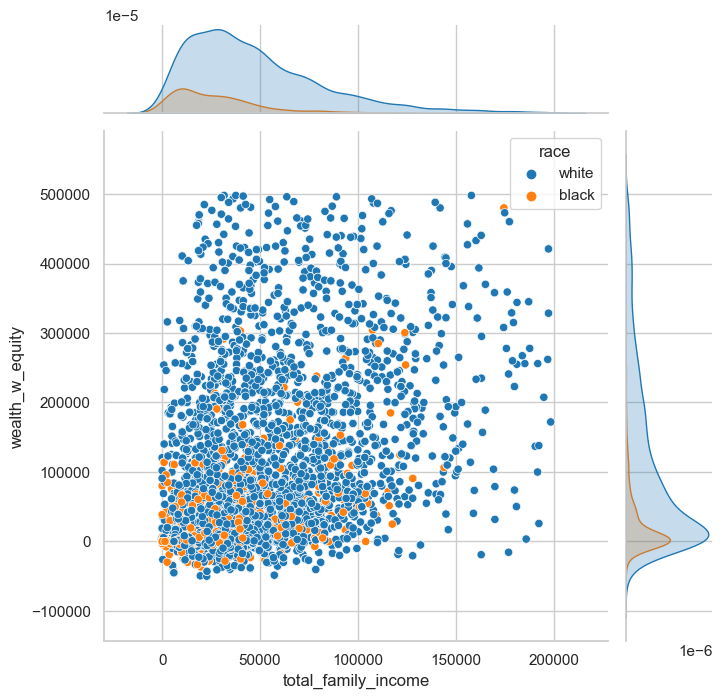

In [112]:
t = d99.sample(10_000, weights=d99.family_weight_99, random_state=99, replace=True)
t = t[(t.total_family_income<200_000) & (t.wealth_w_equity<500_000)
      & (t.total_family_income > -10_000) & (t.wealth_w_equity>-50_000)]

g = sns.jointplot(x="total_family_income", y="wealth_w_equity", data=t,
                  hue = 'race',
                  #kind="reg", truncate=False,
                  #xlim=(0, 60), ylim=(0, 12),
                   height=7)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        wealth_w_equity   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2850.
Date:                Tue, 13 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:26:35   Log-Likelihood:                 1534.5
No. Observations:               31052   AIC:                            -3051.
Df Residuals:                   31043   BIC:                            -2976.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.0461      0.008      5.551      0.000       0.030       0.062
household_class[T.single]           -0.0890      0.007    -13.338      0.000      -0.102      -0.076
household_class[T.single_parent]    -0.0634      0.004    -15.041      0.000      -0.072      -0.055
race[T.white]                        0.1119      0.004     28.016      0.000       0.104       0.120
num_in_fu                           -0.0498      0.009     -5.752      0.000      -0.067      -0.033
housing_expenditure                  0.0534      0.006      9.505      0.000       0.042       0.064
total_family_income                  0.3325      0.006     53.357      0.000       0.320       0.345
adult_years                          0.4150      0.005     87.981      0.000       0.406       0.424
years_completed_education            0.0190      0.004      5.368      0.000       0.012       0.026
==============================================================================
Omnibus:                      496.112   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.861
Skew:                          -0.316   Prob(JB):                    1.30e-113
Kurtosis:                       3.046   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

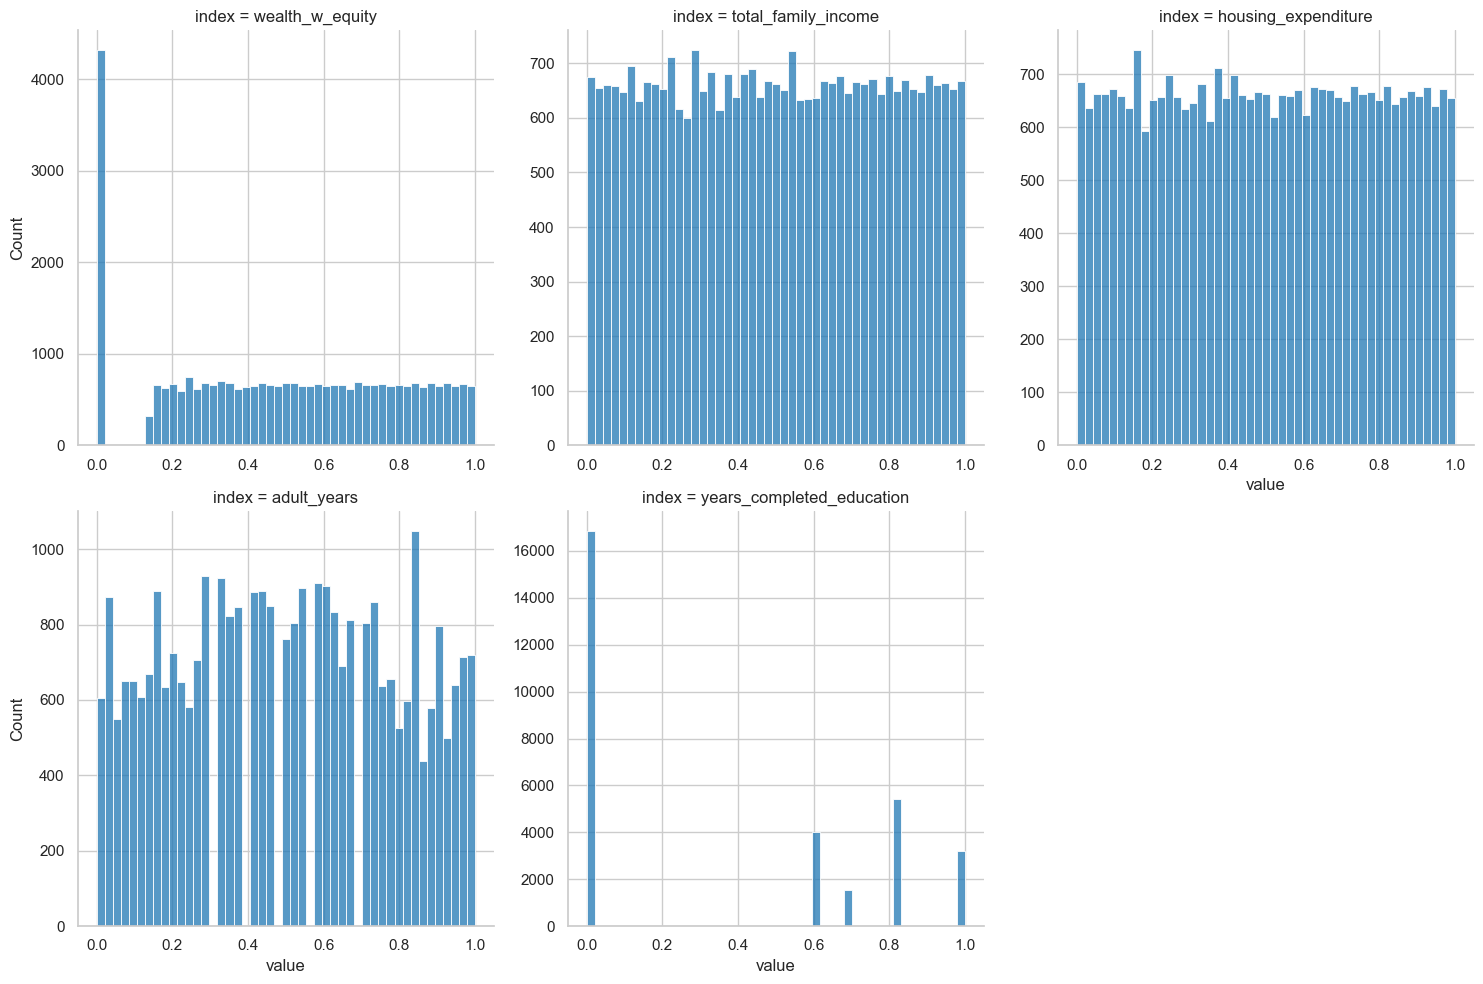

In [312]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

t = d99.sample(50_000, weights=d99.family_weight_99, random_state=42, replace=True)

t = t[(t.total_family_income<200_000) & (t.wealth_w_equity<500_000)
      & (t.total_family_income > -10_000) & (t.wealth_w_equity>-50_000)].copy()

t = t[(t.years_completed_education< 25) & (t.years_completed_education>=12)]

t['years_completed_education'] = np.abs(t.years_completed_education.astype('float') - 12)

t['married'] = t.marital_pairs_indicator.cat.codes == 1
t['single_parent'] = (t['marital_pairs_indicator'].cat.codes == 0 ) & (t['num_in_fu'] >= 2)

t = t[t.age_of_head < 120]
t['adult_years'] = t.age_of_head - 18

t['older'] = t.age_of_head > t.age_of_head.mean()
t['prime_years'] = t.age_of_head.between(35, 50)

t['college'] = t.years_completed_education >= 4

def household_class(row):
    if row['married']:
        return 'married'
    elif row['single_parent']:
        return 'single_parent'
    else:
        return 'single'

t['household_class'] = t.apply(household_class, axis=1)

#t = t[(t.adult_years>0) & (t.adult_years<45) ]
#t = t[t.prime_years]
t = t[t.age_of_head.between(20, 70)]

#t = t[t.wealth_w_equity > 0]

from sklearn import preprocessing

pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)
qt = preprocessing.QuantileTransformer(random_state=0)

def qtf(x):
    return qt.fit_transform(x.values.reshape(-1, 1))[:,0]

def ptf(x):
    return pt.fit_transform(x.values.reshape(-1, 1))[:,0]


z = pd.DataFrame(
    {
        'wealth_w_equity': qtf(t.wealth_w_equity.clip(10, 1_000_000)),
        'total_family_income': qtf(t.total_family_income.clip(10, 500_000)),
        'housing_expenditure': qtf(t.housing_expenditure.clip(1, 500_000)),
        'adult_years': qtf(t.adult_years.clip(1, 70)),
        'years_completed_education': qtf(t.years_completed_education.clip(1, 20)),
        'num_in_fu': qtf(t.num_in_fu),
        'household_class': t.household_class,
        'race': t.race,

        #'vehicle_loan_payment_expenditure': qtf(t.vehicle_loan_payment_expenditure),
        #'vehicle_lease_payment_expenditure': qtf(t.vehicle_lease_payment_expenditure),
    }
)

d = z.set_index('race').drop(columns=['household_class', 'num_in_fu']).stack().to_frame('value').reset_index()
d.columns = ['race', 'index', 'value']
g = sns.displot(
    data=d, x="value", col="index",  #hue="race",
    kind="hist", col_wrap=3, facet_kws=dict(margin_titles=True, sharex=False, sharey=False),
)

plt.plot()

model = smf.ols(formula=
    "wealth_w_equity ~  num_in_fu + housing_expenditure + total_family_income + adult_years + household_class + years_completed_education + race",
                data=z).fit()

model.summary()

## Food Expenditures

<AxesSubplot: xlabel='wealth_w_equity', ylabel='Density'>

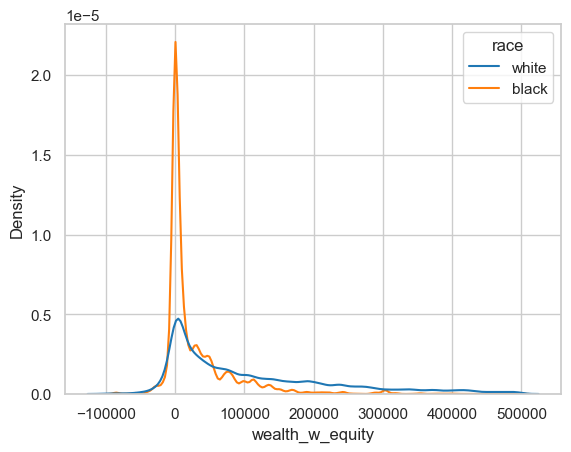

In [86]:
sns.kdeplot(data=sn99[(sn99.wealth_w_equity<500_000) & (sn99.wealth_w_equity>-100_000)],
            x='wealth_w_equity',hue='race')


<AxesSubplot: xlabel='total_family_income', ylabel='Density'>

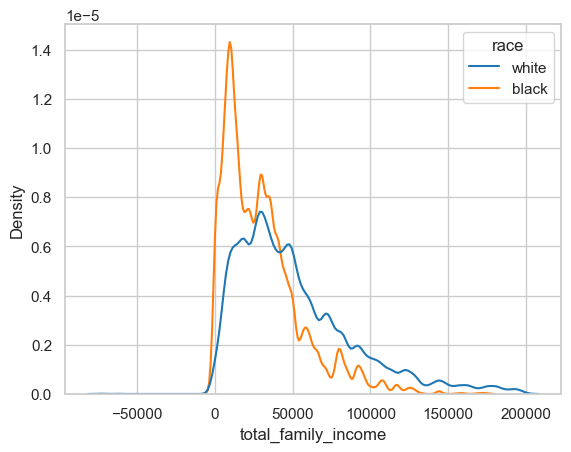

In [87]:
sns.kdeplot(data=sn99[sn99.total_family_income<200_000], x='total_family_income',hue='race')

<AxesSubplot: xlabel='food_expenditure', ylabel='Density'>

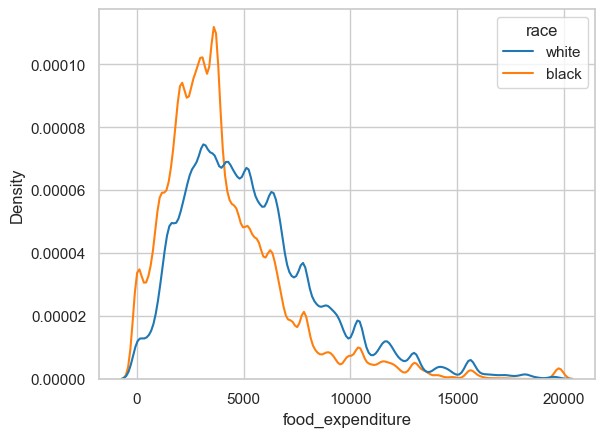

In [88]:
sns.kdeplot(data=sn99[sn99.food_expenditure<20_000], x='food_expenditure',hue='race')

<AxesSubplot: xlabel='food_nocook_expenditure', ylabel='Density'>

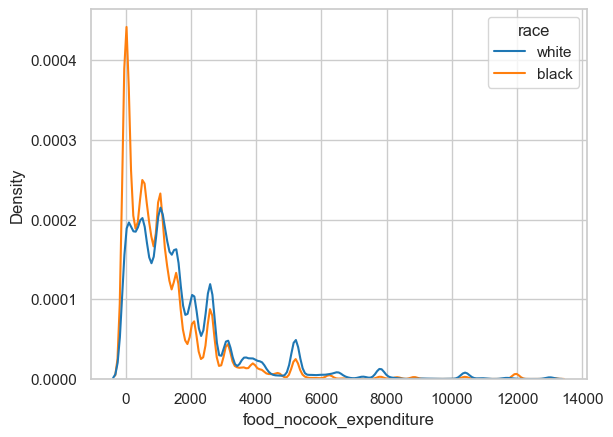

In [89]:
sns.kdeplot(data=sn99[sn99.food_nocook_expenditure< 15000], x='food_nocook_expenditure',hue='race')

In [90]:

t = sn99[['race','total_family_income','food_expenditure',
         'food_delivered_expenditure','food_away_from_home_expenditure', ]].replace({np.inf:np.nan}).dropna()

t['fah'] = (t.food_delivered_expenditure+t.food_away_from_home_expenditure)/t.food_expenditure

t.groupby('race').fah.median()


race
black    0.250000
white    0.272727
Name: fah, dtype: float64

In [91]:
t['fer'] = (t.food_expenditure)/t.total_family_income

t.groupby('race').fer.median()

race
black    0.139259
white    0.108167
Name: fer, dtype: float64

In [92]:

t['fair'] =  (t.food_delivered_expenditure+t.food_away_from_home_expenditure)/t.total_family_income
t.groupby('race').fair.median()

race
black    0.028736
white    0.026597
Name: fair, dtype: float64

# Wealth

In [93]:
# Ratio of home equity to total wealth
t = sn99[['race','home_equity','wealth_w_equity', 'total_family_income' ]].replace({np.inf:np.nan}).dropna()


t['her'] = (t.home_equity/t.wealth_w_equity).replace({np.inf:np.nan, -np.inf:np.nan}).fillna(0)

# remove outliers of t.her. It' mostly just one black family that's upside down on their mortgage
z = t[(t.her > -50) & (t.her < 50)]

z.groupby('race').her.mean().sort_values()


race
black    0.308576
white    0.353861
Name: her, dtype: float64

In [21]:
# ratio > 1 mean that the family has more equity in their home than they have in total wealth,
# which means that they have other debt.
z[(z.race=='black')  & (z.her > 1)].shape, z[(z.race=='black')  & (z.her <1)].shape

((122, 5), (2020, 5))

<AxesSubplot: xlabel='wealth_w_equity', ylabel='Density'>

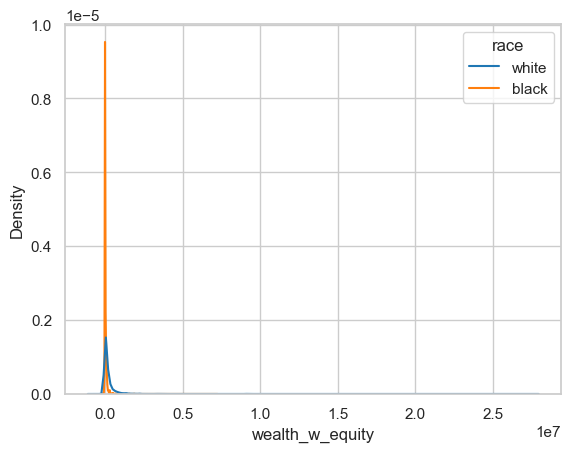

In [94]:
# kde plot z, seperate by race
import seaborn as sns
sns.kdeplot(data=sn99,x='wealth_w_equity', hue='race')

<AxesSubplot: xlabel='housing_expenditure', ylabel='Density'>

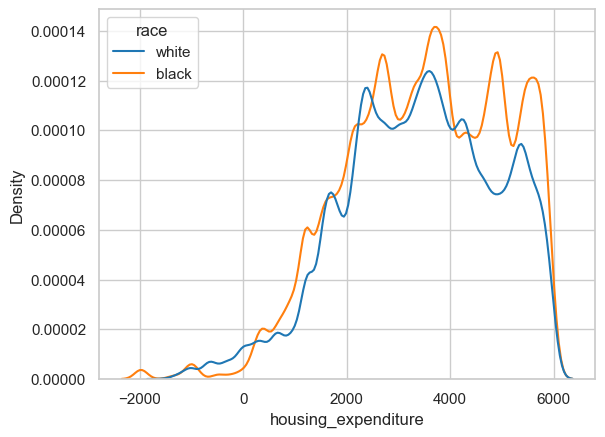

In [96]:
sns.kdeplot(data=sn99[sn99.housing_expenditure<6000],x='housing_expenditure', hue='race')

<AxesSubplot: xlabel='mortgage_expenditure', ylabel='Density'>

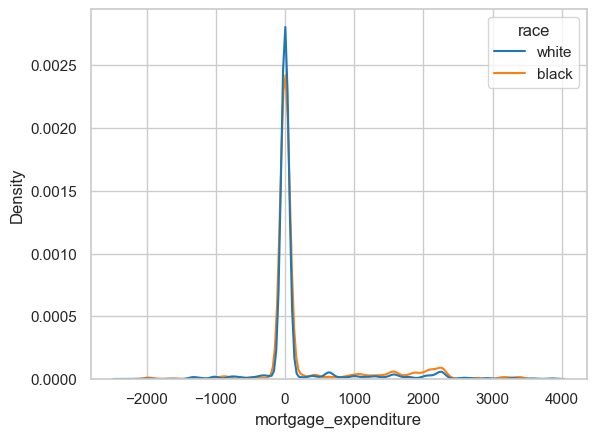

In [97]:
sns.kdeplot(data=sn99[sn99.housing_expenditure<4000],x='mortgage_expenditure', hue='race')